# Car Price Prediction Projects

Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase

 Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.

Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.

Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.

•Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.

Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning<br>
2. Exploratory Data Analysis<br>
3. Data Pre-processing<br>
4. Model Building<br>
5. Model Evaluation<br>
6. Selecting the best model<br>

In [1]:
# importing all libraries

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

from scipy.stats import skew, zscore
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# To display maximum rows and columns in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
#importing dataset
df = pd.read_excel("used_cars CarDekho.xlsx") #Reading excel file
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


Observation:<br>
1. Car_price is our target variable.<br>
2. Unnamed:0 column can be droped.<br>
3. We have both categorical and numerical data.<br>
4. Target variable is continous so this becomes a regression problem.<br>

# Exploratory Data Analysis

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.shape

(12608, 20)

We have 12608 rows and 20 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Endine_disp        12608 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12608 non-null  object
 6   Seating_cap        12553 non-null  object
 7   color              12608 non-null  object
 8   Max_power          12607 non-null  object
 9   front_brake_type   12532 non-null  object
 10  rear_brake_type    12532 non-null  object
 11  cargo_volume       12161 non-null  object
 12  height             12552 non-null  object
 13  width              12552 non-null  object
 14  length             12552 non-null  object
 15  Weight             12571 non-null  object
 16  Insp_score         12608 non-null  objec

Observations:<br>
1. we can see some column has missing values.<br>
2. Data types of all columns is object.<br>


In [7]:
df.columns    # column names of our dataset 

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

# Checking Null Values

In [8]:
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

We can see that top_speed has maximum missing values i.e. 1798. Also columns that have missing values are rear_brake_type,front_brake_type,cargo_volume, height, eight, length, weight, Max_power, Seating_cap.

In [9]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [10]:
df.isnull().sum().sort_values()

Car_Name                 0
City_url                 0
Gear_transmission        0
Car_price                0
Running_in_kms           0
Fuel_type                0
Milage_in_km/ltr        29
Endine_disp             60
Seating_cap            104
Max_power              145
front_brake_type       214
rear_brake_type        215
height                 254
length                 254
width                  255
color                  274
top_speed             4316
Weight                6074
cargo_volume          8388
Insp_score           10876
dtype: int64

<AxesSubplot:>

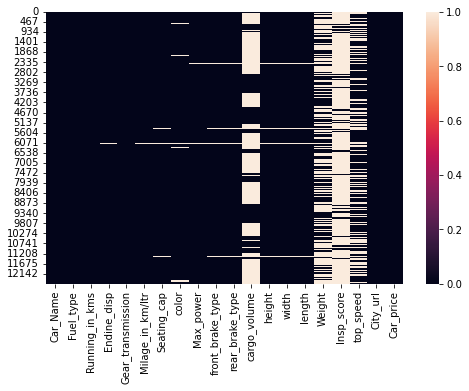

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

We can see graphically that some columns has missing values.

<AxesSubplot:>

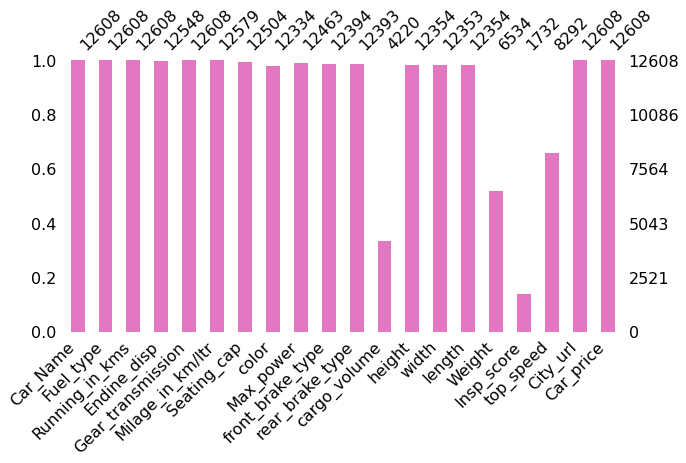

In [12]:
missingno.bar(df, figsize = (10,5), color="tab:pink") 

From missingno bar also we see missing values in our data.

Columns that have missing values more than half its count are :Insp_score, cargo_volume. We can drop these columns.

In [13]:
df.drop(['cargo_volume','Insp_score'], axis=1, inplace=True)

In [14]:
df.shape

(12608, 18)

New shape is 12608 rows and 18 columns

# Cleaning the Data

**Car_Name:**

Since Car_name column has year of manufacture, car model and car name all together so we have to separate them.

In [15]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [16]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

**Car_Price:**

Since Car_Price is our target it should be in the format of continuous data, so we have change the car_price column from lakhs and crores to integer format.

In [17]:
# replacing the unit with numerical values and removing the ',' 
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [18]:
# splitting the unit(numerical) ans amount of car price
df[['a','b']] = df.car_price.str.split(expand=True)  

In [19]:
# changing the datatype to float
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [20]:
#Checking for null values in b column(unit of car price)
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
City_url                0
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
car_price               0
a                       0
b                      91
dtype: int64

In [ ]:
# b has 91 null values as it's a unit column, it is blank because there is no unit so replacing the null values with 1
# getting the final car price by multiplying numerical unit and amount and dropping the extra columns

In [21]:
df['b']=df['b'].fillna(value = 1)

In [22]:
df['car_price'] = df['a'] * df['b']  
df.drop(columns = ['Car_price','a','b'], inplace = True)

**Running_in_kms:**

In [23]:
# removing the unit kms from the value
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')

# removing the commas in number
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

# replacing 1 lakh with numerical number
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')

# Changing the datatype to float
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [24]:
# checking datatypes of all columns after making some changes
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

**Milage_in_km/ltr:**

In Milage_in_km/ltr column the data type is object so we have to change this to float type.

In [25]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

**top_speed:**

Let's change the datatype of top_speed column to float.

In [26]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

**Engine_disp:**

The column 'Endine_disp' should be continuous column so i will convert it to float datatype.

In [27]:
df.Endine_disp = df.Endine_disp.astype('float')

**Converting the data type of columns height, width and length to float datatype:**

In [28]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

**Weight:**

The datatype of Weight has to be changed to float.

In [29]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

**City_url:**

Let's extract city name from city url column.

In [30]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [31]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [32]:
#Let's check the value count again
df['city_name'].value_counts()

delhi-ncr    1490
Bangalore    1486
mumbai       1478
new-delhi    1473
pune         1239
gurgaon      1040
noida         982
hyderabad     918
Chennai       836
kolkata       595
ahmedabad     579
jaipur        492
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [33]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

**Seating_cap:**

In [34]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

**Manu_Year:**

Let's extract car age from manufactured year.

In [35]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2022 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

**Max_power:**

We have to change the datatype of Max_power column to float datatype.

In [36]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [37]:
df['Max_power'] = df['Max_power'].str[0:5]
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

In [38]:
df.Max_power = df.Max_power.astype('float')

**front_brake_type:**

Let's group the similar entries in this column.

In [39]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventillated Disc    

In [40]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [41]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        7171
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Carbon ceramic                                 2
Mechanical-hydraulic dual circuit              1
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

**rare_brake_type:**

Let's group the similar entries in this column.

In [42]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Self Adjusting Drum                            12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


In [43]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [44]:
#saving the cleaned data into csv file
df.to_csv(r"D:\Fliprobo\Car Price Prediction\cleaned_data.csv")

In [45]:
#Checking the datatypes of all columns after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_type          12608 non-null  object 
 1   Running_in_kms     12608 non-null  float64
 2   Endine_disp        12548 non-null  float64
 3   Gear_transmission  12608 non-null  object 
 4   Milage_in_km/ltr   12579 non-null  float64
 5   Seating_cap        12504 non-null  float64
 6   color              12334 non-null  object 
 7   Max_power          12463 non-null  float64
 8   front_brake_type   12394 non-null  object 
 9   rear_brake_type    12393 non-null  object 
 10  height             12354 non-null  float64
 11  width              12353 non-null  float64
 12  length             12354 non-null  float64
 13  Weight             6534 non-null   float64
 14  top_speed          8292 non-null   float64
 15  Car_Brand          12608 non-null  object 
 16  Car_Model          126

we have 12 columns of float datatype and 8 columns of object datatype.

# Handling Missing Values

In [46]:
#Checking null values in the dataset
df.isnull().sum().sort_values()

Fuel_type               0
car_price               0
Car_Model               0
Car_Brand               0
city_name               0
Car_age                 0
Gear_transmission       0
Running_in_kms          0
Milage_in_km/ltr       29
Endine_disp            60
Seating_cap           104
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
length                254
width                 255
color                 274
top_speed            4316
Weight               6074
dtype: int64

In [47]:
#Replacing nan values by median, mode, mean as given below
for col in ['Endine_disp','Milage_in_km/ltr','Max_power','height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [48]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Endine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Brand            0
Car_Model            0
car_price            0
city_name            0
Car_age              0
dtype: int64

we can see all null values are removed

<AxesSubplot:>

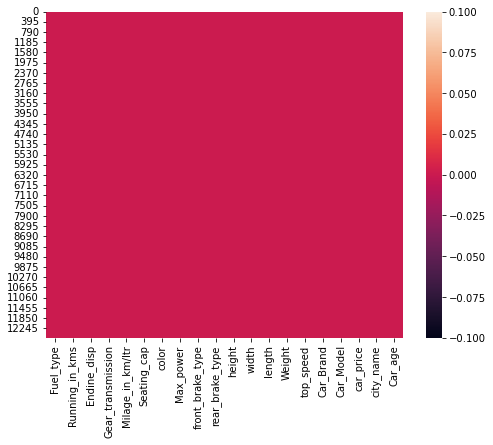

In [49]:
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())

confirmed graphically that there are no null values in our dataset.

# Checking Unique values and Value Counts

In [50]:
df.nunique().sort_values().to_frame()   # unique values

,0
Gear_transmission,2
Fuel_type,5
Seating_cap,8
city_name,12
front_brake_type,13
rear_brake_type,17
Car_age,25
Car_Brand,35
top_speed,120
Endine_disp,143


In [51]:
# checking Value counts 
for col in df:
    print(col)
    print(df[col].value_counts())
    print('\n')

Fuel_type
Petrol      7056
Diesel      5422
CNG           92
LPG           27
Electric      11
Name: Fuel_type, dtype: int64


Running_in_kms
60000.0      142
65000.0      139
70000.0      138
80000.0      119
40000.0      106
50000.0      105
55000.0       98
45000.0       95
75000.0       94
35000.0       92
58000.0       85
68000.0       80
120000.0      79
30000.0       78
42000.0       77
72000.0       69
20000.0       65
43000.0       62
62000.0       61
52000.0       60
66000.0       58
57000.0       58
34000.0       58
67000.0       58
39000.0       57
69000.0       56
53000.0       55
48000.0       55
49000.0       54
59000.0       54
51000.0       53
25000.0       53
78000.0       52
90000.0       52
64000.0       52
33000.0       51
32000.0       51
56000.0       51
24000.0       50
41000.0       49
71000.0       49
85000.0       48
28000.0       47
38000.0       47
54000.0       47
36000.0       45
100000.0      45
15000.0       44
44000.0       43
77000.0       43
74000.0 

550000.0      140
450000.0      128
425000.0      126
650000.0      121
350000.0      116
325000.0      107
525000.0      103
575000.0       99
625000.0       98
475000.0       92
395000.0       90
400000.0       85
675000.0       83
375000.0       78
275000.0       78
500000.0       76
495000.0       76
250000.0       76
295000.0       73
300000.0       73
345000.0       71
385000.0       69
265000.0       66
490000.0       65
725000.0       64
465000.0       63
565000.0       62
480000.0       60
690000.0       59
775000.0       58
530000.0       58
360000.0       58
270000.0       58
590000.0       57
445000.0       57
290000.0       57
285000.0       57
390000.0       56
365000.0       56
430000.0       56
315000.0       55
470000.0       55
850000.0       54
260000.0       54
340000.0       54
585000.0       51
310000.0       50
335000.0       50
245000.0       50
235000.0       50
370000.0       50
280000.0       50
950000.0       49
545000.0       49
540000.0       48
700000.0  

# Checking Duplicates

In [52]:
df.duplicated().sum()

796

In [53]:
df.drop_duplicates(inplace=True)
df.shape

(11812, 20)

After removing duplicates we have  11812 rows and 20 columns

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Running_in_kms,11812.0,57875.737809,3.964796e+04,200.0,33073.25,55000.00,76000.00,1080000.0
Endine_disp,11812.0,1430.912123,4.925664e+02,0.0,1197.00,1248.00,1498.00,5998.0
Milage_in_km/ltr,11812.0,19.608627,4.211795e+00,0.0,17.05,19.67,22.15,36.0
Seating_cap,11812.0,5.216136,6.919597e-01,2.0,5.00,5.00,5.00,10.0
Max_power,11812.0,99.522913,4.379747e+01,32.5,74.00,86.80,110.00,641.0
height,11812.0,1563.584067,1.105008e+02,148.0,1489.00,1520.00,1630.00,1995.0
width,11812.0,1717.467237,1.250578e+02,1410.0,1665.00,1700.00,1765.00,2220.0
length,11812.0,4078.903497,3.971362e+02,3099.0,3765.00,3995.00,4395.00,5295.0
Weight,11812.0,1599.351507,3.182351e+02,1000.0,1505.00,1520.00,1550.00,3350.0
top_speed,11812.0,171.483237,2.124721e+01,86.0,163.00,169.00,173.00,327.0


Observations:<br>
1. All columns has same count ie. 11812.<br>
2. Mean > median columns are: Running_in_kms, Endine_disp, Seating_cap, Max_power, height,width,Milage_in_km/ltr
                              length, Weight, top_speed,car_price,Car_age. All these columns are right skewed.<br>
3. Larger difference between 75% and Max value indicates presence of outliers.<br>

# Visulaizations

**Univariate Analysis:**

In [55]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print("Categorical Col:",categorical_columns)

# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print("Numerical Col:",numerical_columns)

Categorical Col: ['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']
Numerical Col: ['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


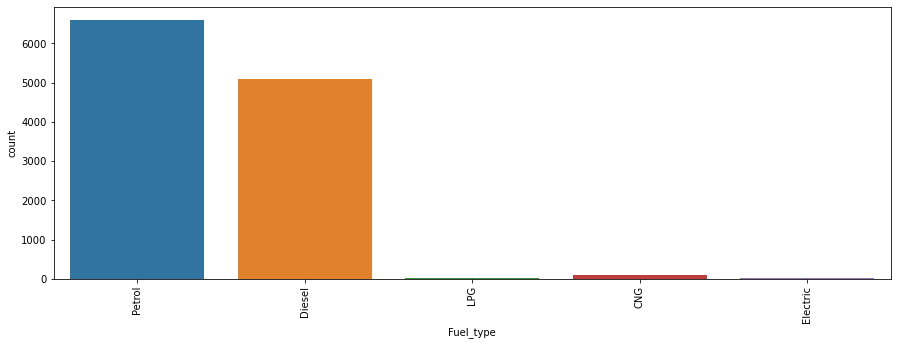

In [56]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

Petrol is the most common fuel type among most cars.<br>
Electric is the least fuel type found in our data

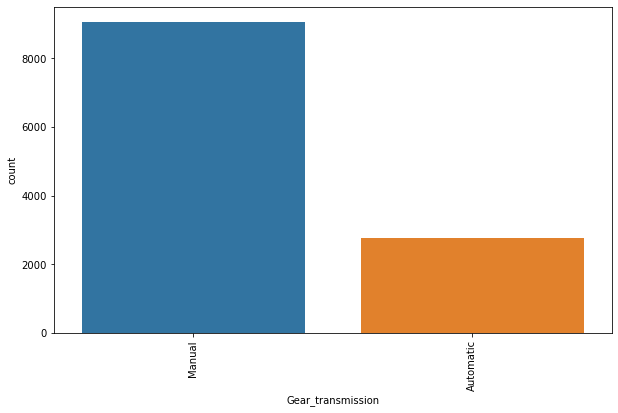

In [57]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

Manual gear transmission cars are more in number than automatic gear transmission.

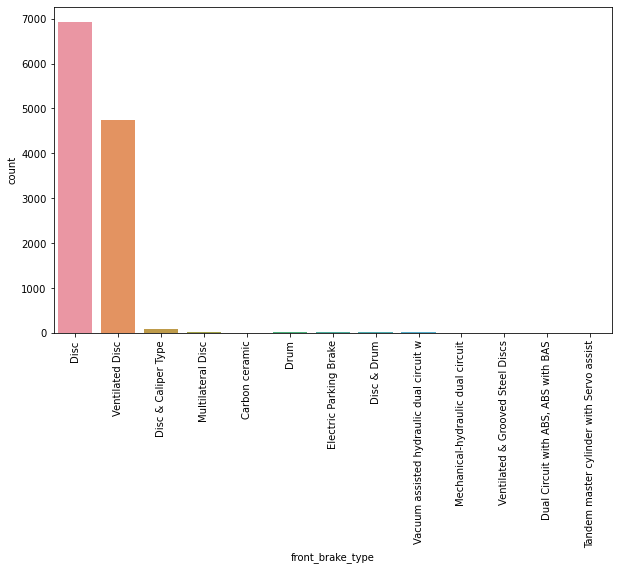

In [58]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

Disc is the most common front brake type in most cars followed by Ventilated Disc

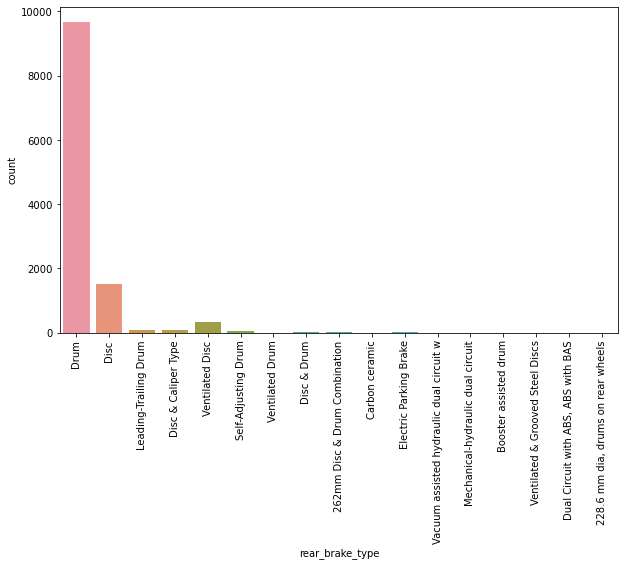

In [59]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

Drum is the most found rear brake type followed by disc.

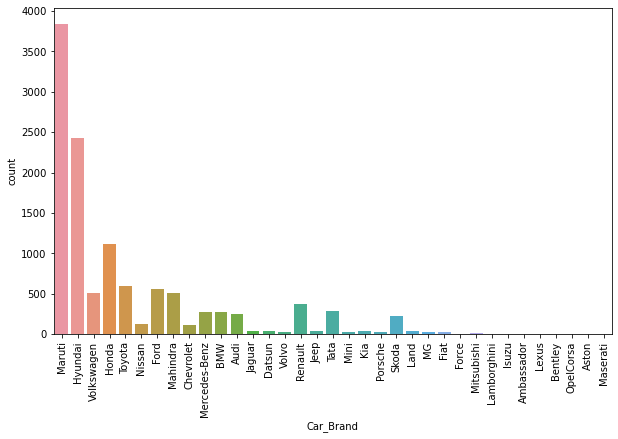

In [60]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

Most found brand is maruti and least is maserati.

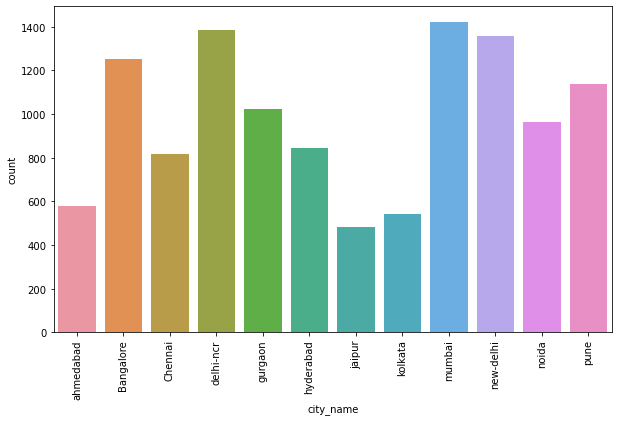

In [61]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

Highest numbers of used cars are available in Mumbai, followed bt New-Delhi, Delhi-NCR, and least cars are available in Jaipur.

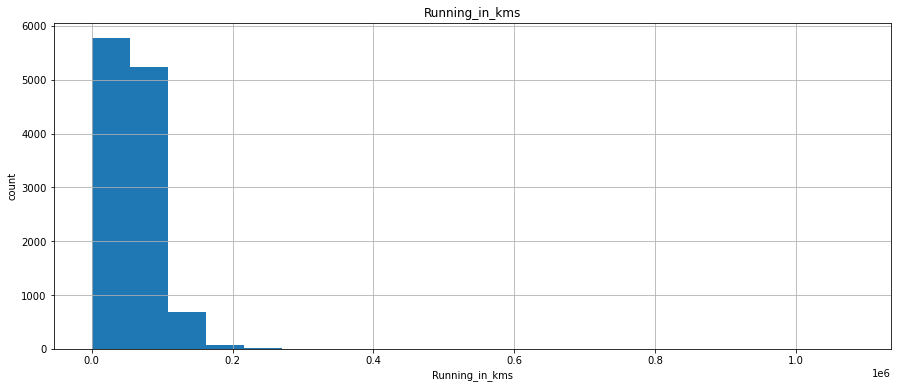

**********************************************************************


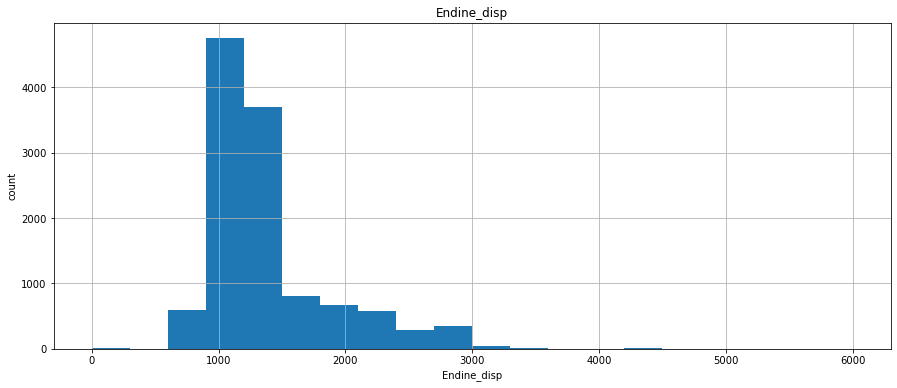

**********************************************************************


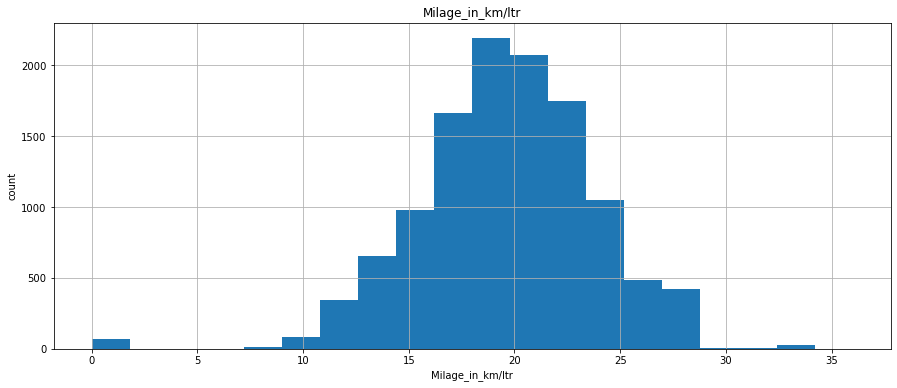

**********************************************************************


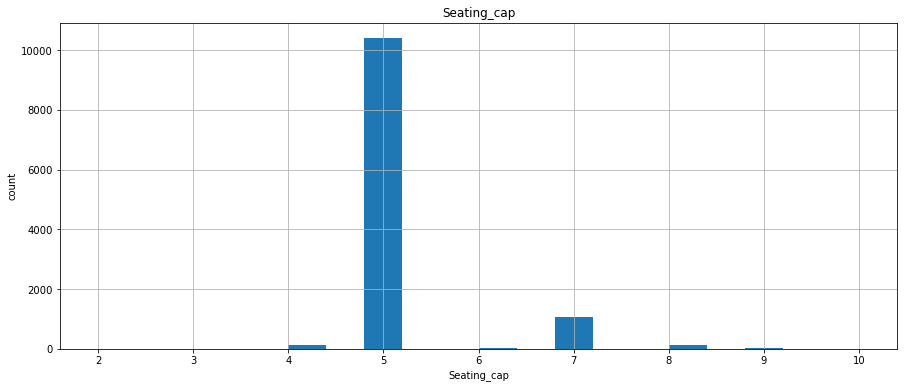

**********************************************************************


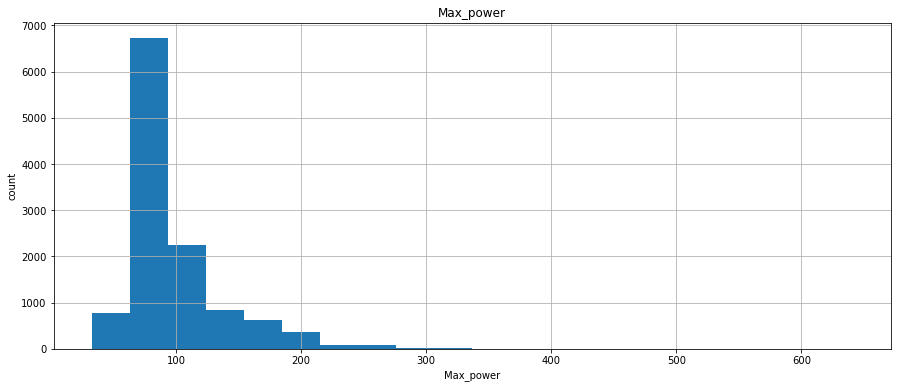

**********************************************************************


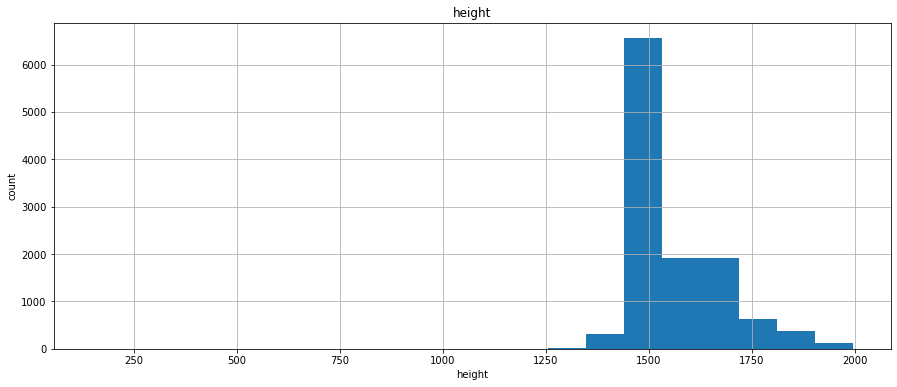

**********************************************************************


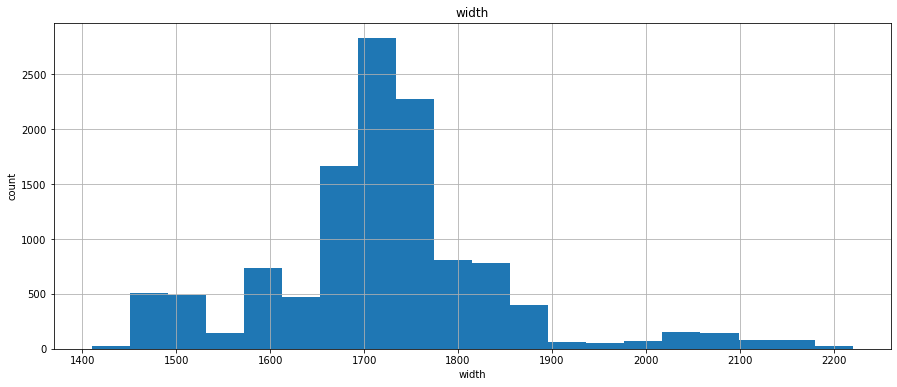

**********************************************************************


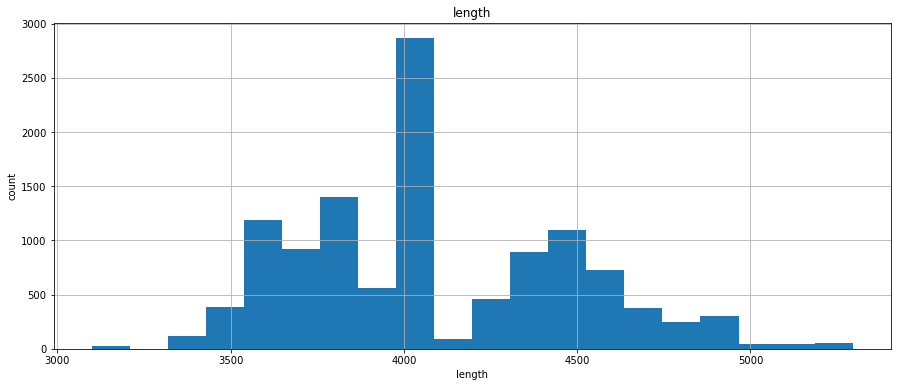

**********************************************************************


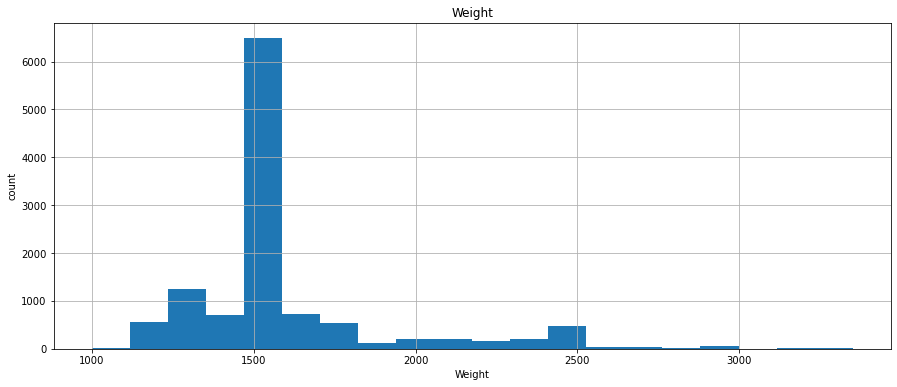

**********************************************************************


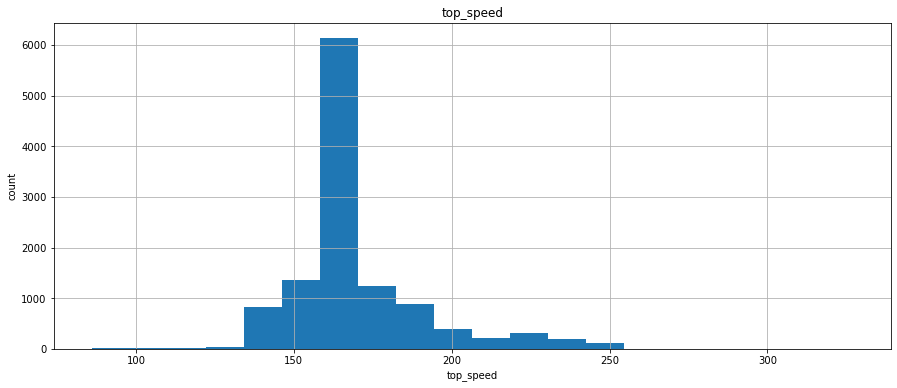

**********************************************************************


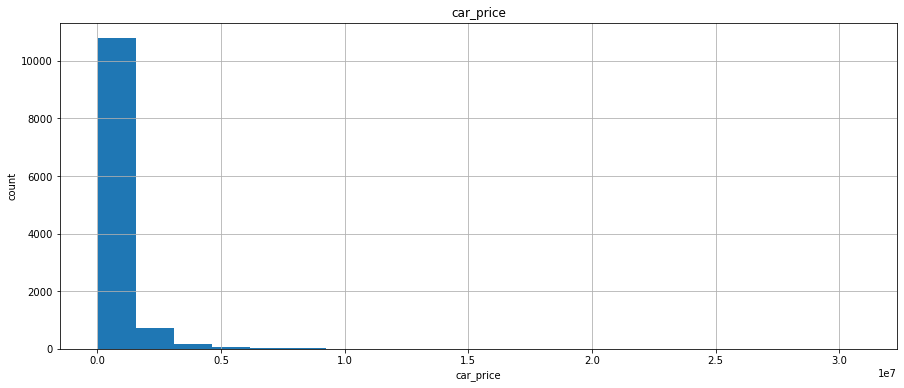

**********************************************************************


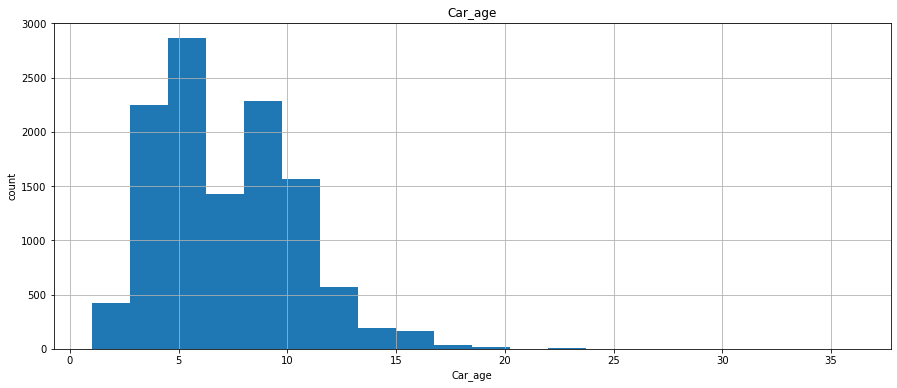

**********************************************************************


In [62]:
# plotting continuous feature variables
for column in df.columns:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure(figsize=(15,6))
        df[column].hist(bins=20)
        plt.xlabel(column)
        plt.ylabel('count')
        plt.title(column)
        plt.show()
        print('*'*70)

In above plots we see how the continuous data is distributed.

**Bivariate Analysis**

In [63]:
col=['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 
     'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed']

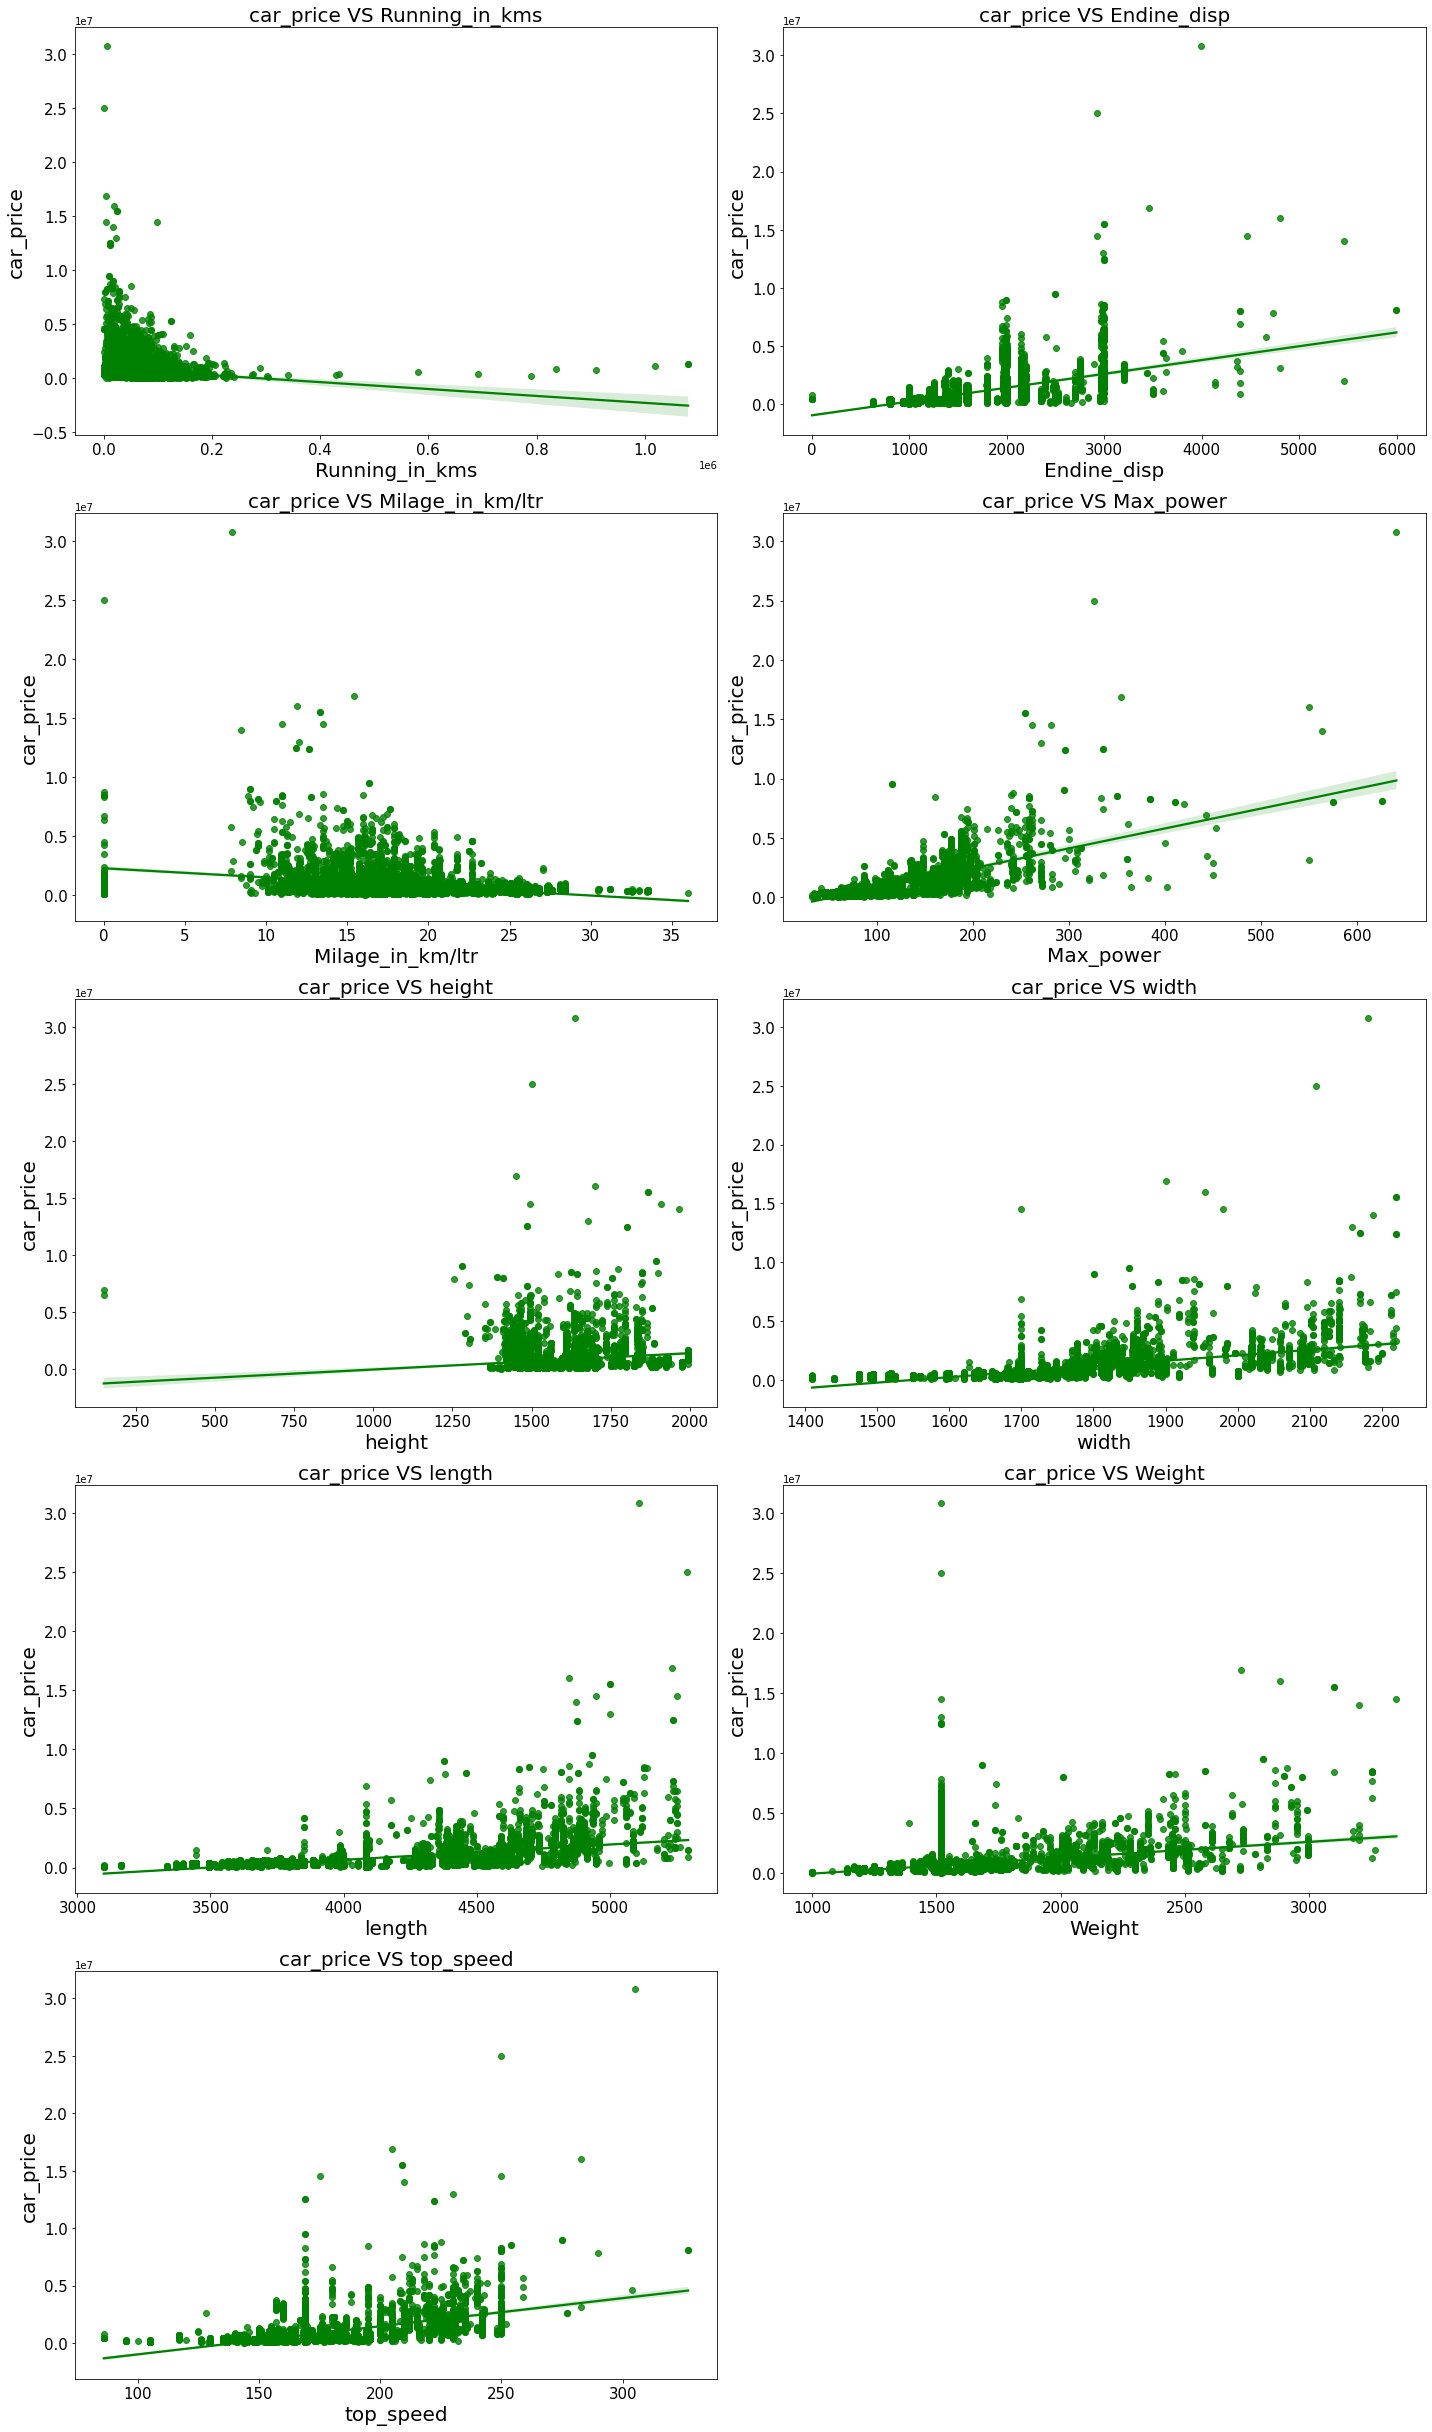

In [64]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

Observation:

1.Maximum cars are having below 20k driven kms. And car price is high for less driven cars.<br>
2.Maximum cars are having 1000-3000 Endine_disp. And car price is high for 3000 Endine_disp.<br>
3.Maximum cars are having milage of 10-25kms. And ,milage has no proper relation with car price.<br>
4.As Max_power is increasing car price is also increasing.<br>
5.Car_price has no proper relation with height.<br>
6.As the width is increasing car price is also increasing.<br>
7.As length is increasing car price is also increasing.<br>
8.Weight also has linear relationship with car price.<br>
9.As top_speed is increasing car price is also increasing.<br>

In [65]:
col1=['Seating_cap','Car_age']

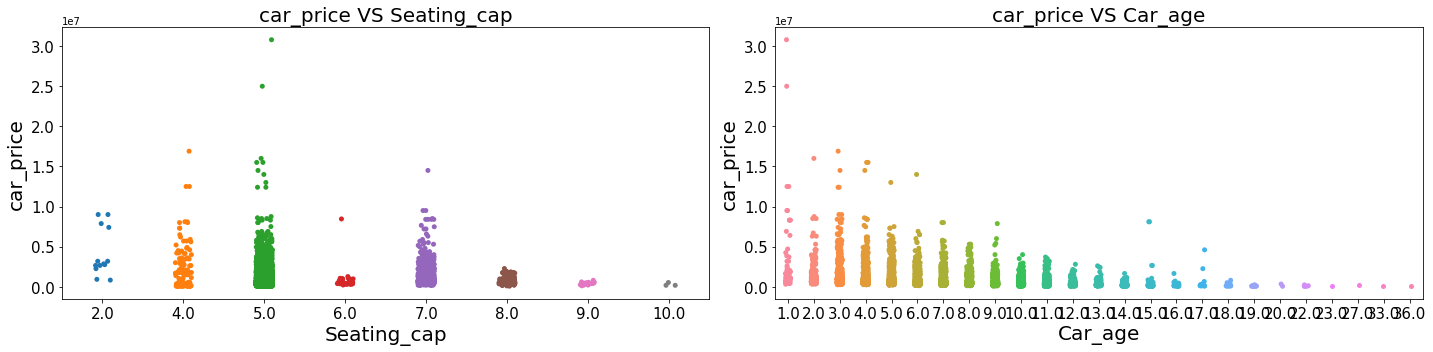

In [66]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

Cars with 5 and 4 seats are having highest price.<br>
As the age of the car increases the car price decreases.

In [67]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

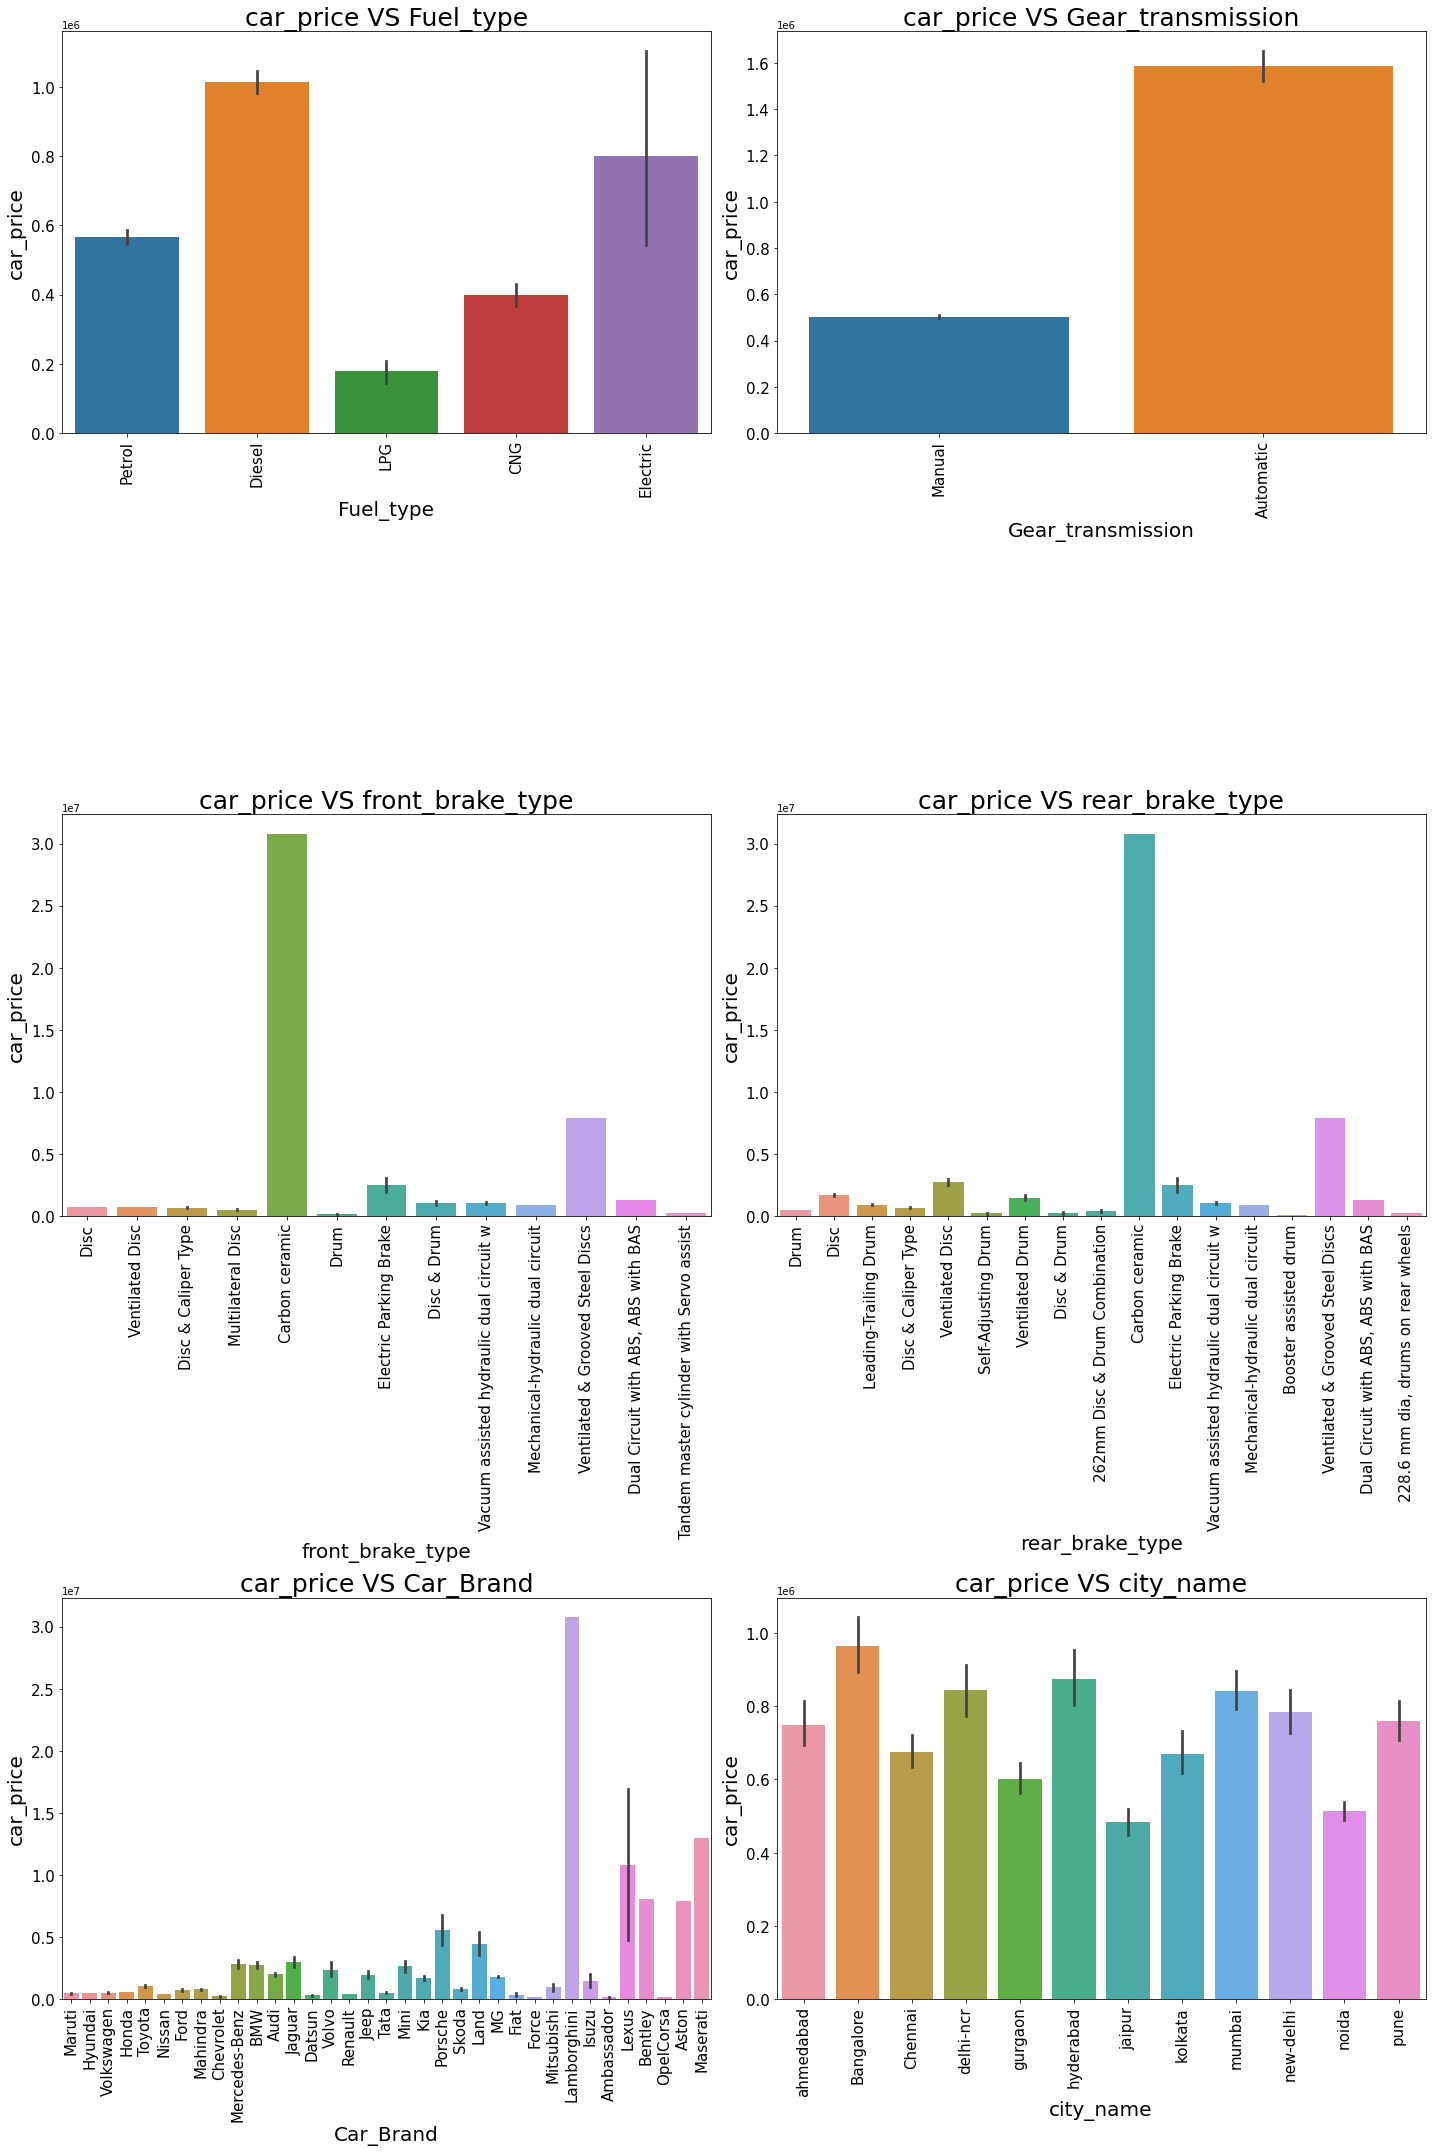

In [68]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()


Observations:

1. For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.<br>
2. Cars with automatic gear are costlier than manual gear cars.<br>
3. Cars with Carbon Ceramic front break are costlier compared to other cars.<br>
4. Cars with carbon Ceramic rear braek are costlier compared to other cars.<br>
5. Lamborghini brand cars are having highset sale price.<br>
6. In Bangalore, Hyderabad and delhi-ncr the car prices are high as they are highly populated cities.<br>

# Correlation

In [69]:
#Checking correlation of the dataset
df.corr()  

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,car_price,Car_age
Running_in_kms,1.000000,0.192793,-0.058002,0.160492,0.053823,0.083693,0.092965,0.160971,0.192286,0.041468,-0.126317,0.425396
Endine_disp,0.192793,1.000000,-0.576329,0.446198,0.853103,0.374953,0.713525,0.798983,0.732165,0.571256,0.581814,0.099144
Milage_in_km/ltr,-0.058002,-0.576329,1.000000,-0.329186,-0.533664,-0.285201,-0.374317,-0.475659,-0.494074,-0.294253,-0.322607,-0.234918
Seating_cap,0.160492,0.446198,-0.329186,1.000000,0.173218,0.673171,0.233186,0.341037,0.513646,-0.111782,0.097470,0.005584
Max_power,0.053823,0.853103,-0.533664,0.173218,1.000000,0.165611,0.760331,0.780429,0.616637,0.745312,0.731215,-0.005857
height,0.083693,0.374953,-0.285201,0.673171,0.165611,1.000000,0.228576,0.172339,0.447966,-0.151470,0.157324,-0.100875
width,0.092965,0.713525,-0.374317,0.233186,0.760331,0.228576,1.000000,0.780510,0.638814,0.636092,0.578914,-0.116232
length,0.160971,0.798983,-0.475659,0.341037,0.780429,0.172339,0.780510,1.000000,0.648334,0.645138,0.511190,0.014766
Weight,0.192286,0.732165,-0.494074,0.513646,0.616637,0.447966,0.638814,0.648334,1.000000,0.406561,0.419034,0.065655
top_speed,0.041468,0.571256,-0.294253,-0.111782,0.745312,-0.151470,0.636092,0.645138,0.406561,1.000000,0.517921,0.037051


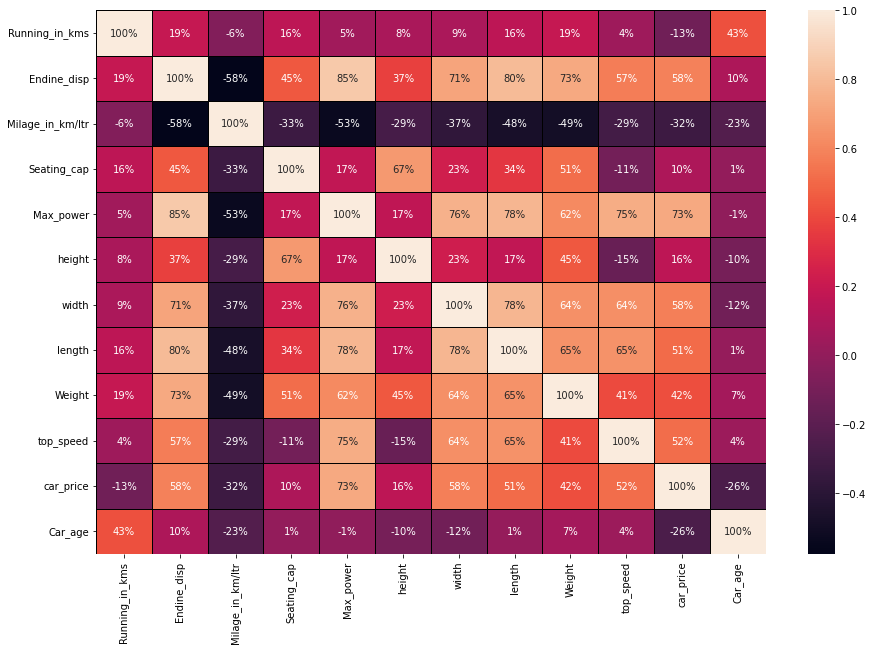

In [70]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() ,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rocket',annot=True)
plt.show()

Observations:<br>
1. Highly and positively correlated: Max_power, width, Endine_disp, top_speed, weight, length.
2. Negatively and least correlated: Running_in_kms, Car_age.

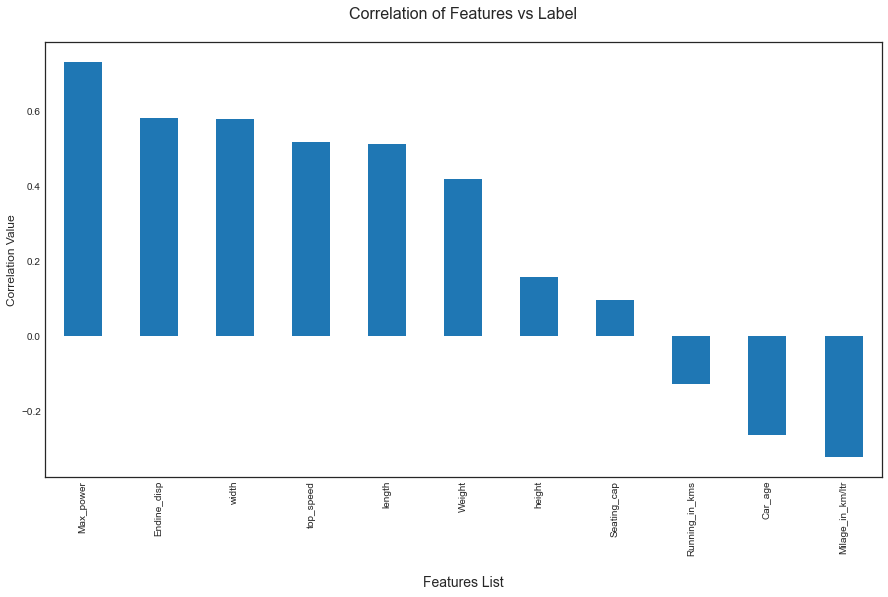

In [71]:
# plotting bar plot of correlation
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['car_price'].sort_values(ascending=False).drop('car_price').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

we can see from above graph that max_power has highest correlation with car_price followed by, endine-disp and least correlation is with Seating_cap

# Encoding the Categorical data

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [73]:
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,4,131125.0,998.0,1,21.79,5.0,70,67.05,1,7,1675.0,1620.0,3655.0,1340.0,169.0,21,246,294000.0,2,8.0
1,4,73875.0,1197.0,1,18.90,5.0,176,82.00,1,7,1520.0,1660.0,3765.0,1520.0,165.0,11,110,480000.0,2,7.0
2,1,97922.0,1498.0,1,22.27,5.0,176,108.60,12,7,1467.0,1699.0,4390.0,1750.0,180.0,33,238,711000.0,2,4.0
3,4,24230.0,998.0,1,21.70,5.0,135,67.05,12,7,1564.0,1520.0,3565.0,1170.0,169.0,21,192,422000.0,2,3.0
4,4,41174.0,998.0,0,20.51,5.0,70,67.00,12,7,1700.0,1495.0,3599.0,1350.0,152.0,21,246,430000.0,2,5.0


Hence all our categorical data is converted to numerical format

In [74]:
df.shape  # checking the shape

(11812, 20)

# Checking Outliers

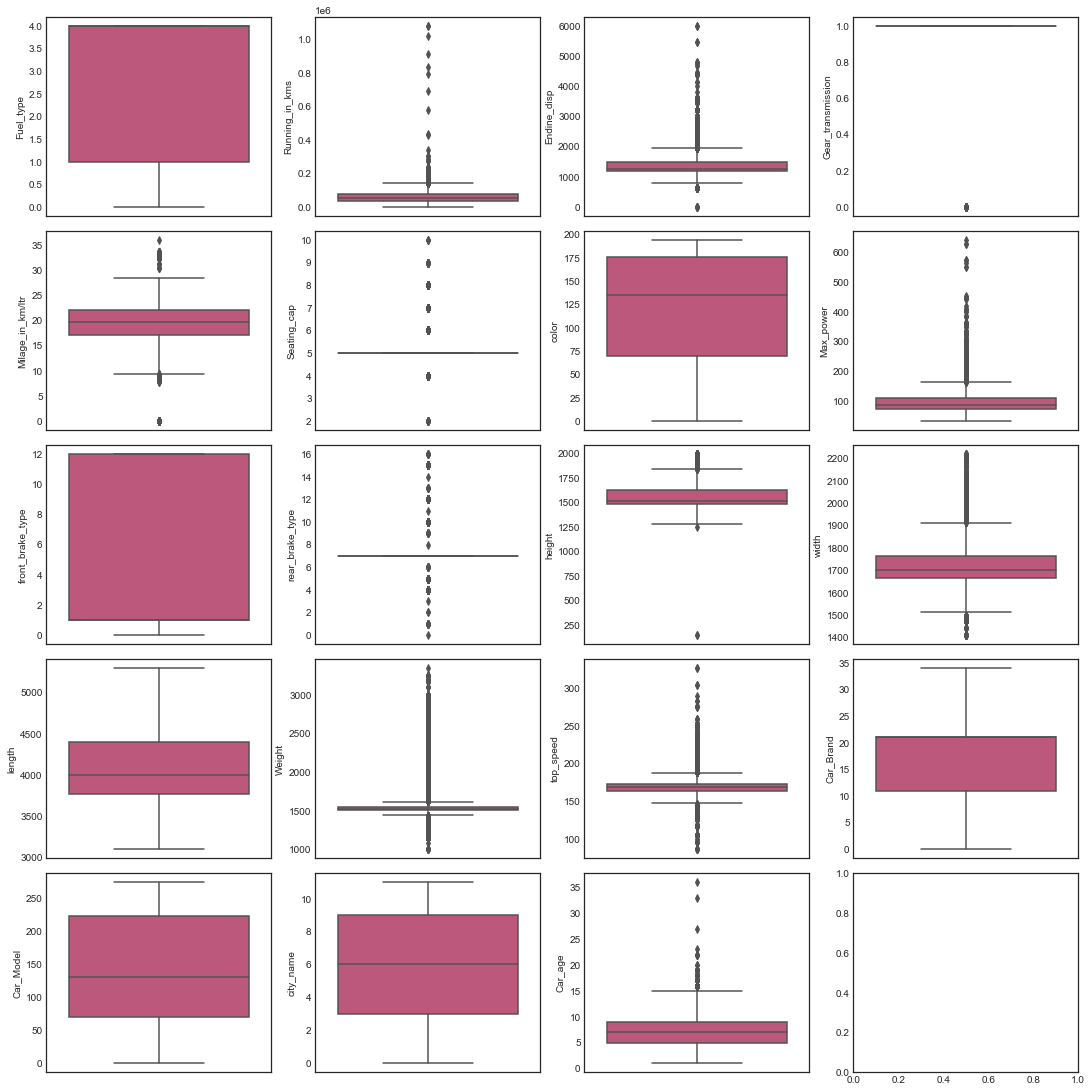

In [75]:
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(15,15))
index = 0
features = df.drop("car_price", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette='plasma')
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above box plots we can see that columns having outliers are: Running_in_kms, Endine_disp, Milage_in_km/ltr, Seating_cap, height, width, weight, top_speed, car_age.
I have not considered encoded columns for outliers    

**Removing Outliers**

In [76]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))
df1_new=df[(z<3).all(axis=1)]
df1_new.head(10)

(array([   17,    29,    60, ..., 11808, 11809, 11810], dtype=int64), array([ 5,  5, 14, ..., 14,  4,  4], dtype=int64))


,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,4,131125.0,998.0,1,21.79,5.0,70,67.05,1,7,1675.0,1620.0,3655.0,1340.0,169.0,21,246,294000.0,2,8.0
1,4,73875.0,1197.0,1,18.90,5.0,176,82.00,1,7,1520.0,1660.0,3765.0,1520.0,165.0,11,110,480000.0,2,7.0
2,1,97922.0,1498.0,1,22.27,5.0,176,108.60,12,7,1467.0,1699.0,4390.0,1750.0,180.0,33,238,711000.0,2,4.0
3,4,24230.0,998.0,1,21.70,5.0,135,67.05,12,7,1564.0,1520.0,3565.0,1170.0,169.0,21,192,422000.0,2,3.0
4,4,41174.0,998.0,0,20.51,5.0,70,67.00,12,7,1700.0,1495.0,3599.0,1350.0,152.0,21,246,430000.0,2,5.0
5,4,57341.0,1196.0,1,16.11,5.0,176,72.42,1,7,1825.0,1475.0,3675.0,1510.0,169.0,21,80,279000.0,2,10.0
6,4,38647.0,1497.0,1,17.00,5.0,103,118.00,1,7,1480.0,1695.0,4420.0,1520.0,169.0,10,60,399000.0,2,11.0
7,4,17116.0,1196.0,1,16.11,5.0,176,72.42,1,7,1825.0,1475.0,3675.0,1510.0,169.0,21,80,472000.0,2,2.0
8,4,45347.0,1196.0,1,15.37,5.0,176,73.00,12,7,1800.0,1475.0,3675.0,1510.0,145.0,21,80,381000.0,2,6.0
9,4,45203.0,1197.0,1,20.40,5.0,176,81.80,12,7,1530.0,1735.0,3840.0,1315.0,165.0,21,214,464000.0,2,6.0


In [77]:
print("Shape of old data",df.shape)
print("Shape of new data",df1_new.shape)

Shape of old data (11812, 20)
Shape of new data (10611, 20)


In [78]:
dataloss= ((11812-10611)/10611)*100
print("PErcentage data loss is", dataloss)

PErcentage data loss is 11.3184431250589


After removing outliers we are having 11% data loss which is more than enough because we still have a large amount of data.

In [79]:
df = df1_new.copy()       # copying the updated data to old dataframe

# Checking Skewness

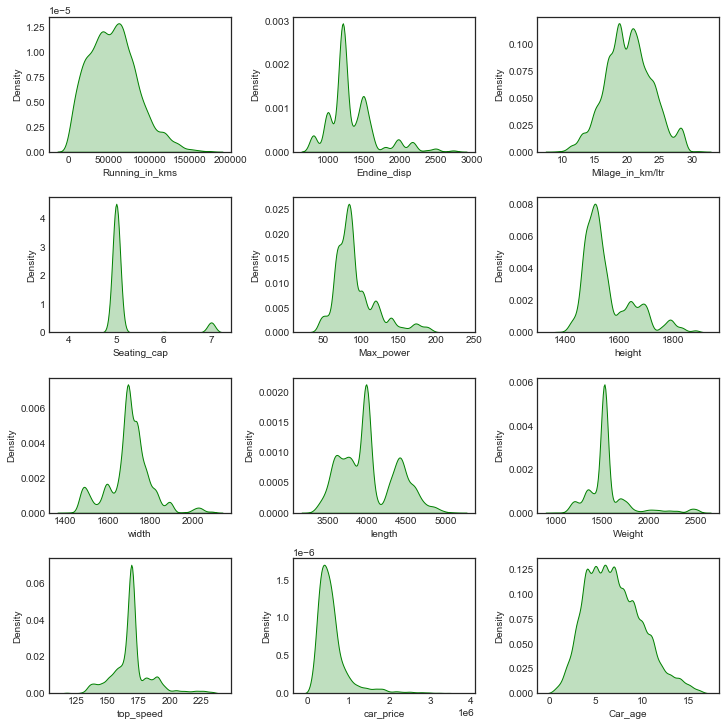

In [80]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(10,10))
index = 0
ax = ax.flatten()
for col, value in df[numerical_columns].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We see from above plots that skewness is present in some columns which are:height, Endine_disp, top_speed, Max_power, Weight, seating_cap
again I am ignoring the encoded coluumns as there is no point in treating their skewness    

In [81]:
# checking the value of skewness of each column
df.skew().sort_values()

Gear_transmission   -1.556725
rear_brake_type     -1.083645
color               -0.574283
Fuel_type           -0.424343
city_name           -0.092968
Car_Model           -0.000100
Milage_in_km/ltr     0.103828
width                0.173033
Car_Brand            0.249032
length               0.405039
front_brake_type     0.463771
Car_age              0.499085
Running_in_kms       0.531132
top_speed            0.861725
height               1.287100
Endine_disp          1.393030
Max_power            1.401373
Weight               1.967767
car_price            2.832222
Seating_cap          3.218001
dtype: float64

# Splitting the dataframe in Feature and target Variable.

In [82]:
x = df.drop('car_price', axis=1)
y = df['car_price']

# Scaling Features using Standard Scaler

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(10)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,0.813936,2.533725,-1.001163,0.488901,0.445365,-0.276059,-0.946033,-0.869946,-0.796984,0.302389,1.351721,-0.778026,-1.061582,-0.876124,-0.016652,0.377734,1.119738,-1.020713,0.350630
1,0.813936,0.617880,-0.408728,0.488901,-0.374652,-0.276059,1.069231,-0.345220,-0.796984,0.302389,-0.354269,-0.388589,-0.745387,-0.125192,-0.259285,-0.886264,-0.459710,-1.020713,0.011999
2,-1.219659,1.422602,0.487366,0.488901,0.581561,-0.276059,1.069231,0.588406,1.259675,0.302389,-0.937607,-0.008888,1.051178,0.834333,0.650586,1.894532,1.026829,-1.020713,-1.003892
3,0.813936,-1.043468,-1.001163,0.488901,0.419828,-0.276059,0.289742,-0.869946,1.259675,0.302389,0.130012,-1.751618,-1.320287,-1.585338,-0.016652,0.377734,0.492604,-1.020713,-1.342522
4,0.813936,-0.476444,-1.001163,-2.045405,0.082174,-0.276059,-0.946033,-0.871701,1.259675,0.302389,1.626881,-1.995017,-1.222554,-0.834406,-1.047839,0.377734,1.119738,-1.020713,-0.665261
5,0.813936,0.064577,-0.411705,0.488901,-1.166294,-0.276059,1.069231,-0.681466,-0.796984,0.302389,3.002679,-2.189735,-1.004092,-0.166910,-0.016652,0.377734,-0.808118,-1.020713,1.027890
6,0.813936,-0.561009,0.484389,0.488901,-0.913763,-0.276059,-0.318639,0.918334,-0.796984,0.302389,-0.794524,-0.047832,1.137414,-0.125192,-0.016652,-1.012664,-1.040390,-1.020713,1.366521
7,0.813936,-1.281535,-0.411705,0.488901,-1.166294,-0.276059,1.069231,-0.681466,-0.796984,0.302389,3.002679,-2.189735,-1.004092,-0.166910,-0.016652,0.377734,-0.808118,-1.020713,-1.681152
8,0.813936,-0.336797,-0.411705,0.488901,-1.376264,-0.276059,1.069231,-0.661108,1.259675,0.302389,2.727520,-2.189735,-1.004092,-0.166910,-1.472446,0.377734,-0.808118,-1.020713,-0.326631
9,0.813936,-0.341616,-0.408728,0.488901,0.050962,-0.276059,1.069231,-0.352240,1.259675,0.302389,-0.244205,0.341605,-0.529799,-0.980420,-0.259285,0.377734,0.748103,-1.020713,-0.326631


# Removing Skewness

In [84]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,0.815594,2.172797,-1.231050,0.488901,0.463089,-0.179501,-1.011818,-1.041799,-0.798998,0.233973,1.347565,-0.776424,-1.119152,-1.105551,0.075366,0.430802,1.119054,-1.019831,0.456684
1,0.815594,0.689500,-0.285973,0.488901,-0.356122,-0.179501,1.203150,-0.172183,-0.798998,0.233973,-0.134069,-0.382998,-0.719450,0.081752,-0.183240,-0.885130,-0.457756,-1.019831,0.129097
2,-1.224995,1.355164,0.701983,0.488901,0.595777,-0.179501,1.203150,0.825968,1.258429,0.233973,-1.235417,-0.001712,1.056711,1.010971,0.712551,1.778718,1.026615,-1.019831,-1.048401
3,0.815594,-1.095017,-1.231050,0.488901,0.438122,-0.179501,0.117998,-1.041799,1.258429,0.233973,0.489465,-1.767485,-1.462187,-2.606560,0.075366,0.430802,0.494468,-1.019831,-1.493849
4,0.815594,-0.410637,-1.231050,-2.045405,0.105000,-0.179501,-1.011818,-1.045081,1.258429,0.233973,1.478244,-2.016562,-1.330987,-1.028343,-1.115734,0.430802,1.119054,-1.019831,-0.627050


In [85]:
x.skew().sort_values()  

Seating_cap         -4.679264
Gear_transmission   -1.556725
Fuel_type           -0.414105
Weight              -0.246954
color               -0.155565
Endine_disp         -0.089712
top_speed           -0.086013
Max_power           -0.075552
city_name           -0.029820
Milage_in_km/ltr    -0.008415
Car_Model           -0.003607
length               0.016501
Car_age              0.032809
height               0.035558
Running_in_kms       0.053260
Car_Brand            0.067752
width                0.105803
front_brake_type     0.460764
rear_brake_type      1.614980
dtype: float64

Hence here we have tried removing skewness using power transformation.

# Principle Component Analysis(PCA)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=19, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,2.061756,-1.342393,0.190407,-0.596725,-0.236805,0.455472,-0.170709,-2.070247,-0.242220,-0.886420,0.469883,0.668633,-2.179008,0.079246,-0.629231,-0.196444,-0.005218,0.206990,0.086908
1,0.758319,0.197878,0.676694,-0.743719,-0.573034,1.239503,-1.403332,0.301906,0.372441,0.128419,-0.097637,0.410326,-0.326525,-0.067068,-0.693224,-0.015670,-0.008894,-0.290408,0.056182
2,-1.551801,-1.540088,0.261161,1.460147,-0.257758,-0.995182,-0.525687,-0.710993,1.725495,1.883352,0.096650,-0.688492,0.046299,0.730526,-1.161566,0.938777,0.013073,-0.080686,-0.392792
3,3.504525,0.772178,-1.161564,0.022676,0.505466,0.264872,0.816234,-0.483532,1.696550,0.318579,-0.705624,-0.650649,-1.327295,0.162888,0.231886,0.950336,0.671278,0.135422,-0.123299
4,2.750028,0.374927,-1.345852,-1.150314,0.952191,-0.205032,1.312355,-1.351385,1.740375,-1.435828,1.463812,0.047798,-0.192160,0.224909,-0.119100,0.819155,-0.371182,0.208759,0.052141


# Checking Multicolliearity

In [87]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Fuel_type,1.0
1,Running_in_kms,1.0
2,Endine_disp,1.0
3,Gear_transmission,1.0
4,Milage_in_km/ltr,1.0
5,Seating_cap,1.0
6,color,1.0
7,Max_power,1.0
8,front_brake_type,1.0
9,rear_brake_type,1.0


As we can see all columns VIF factor is less than 10 we can proceed with this data

# Finding Best Random State For Regression Model

In [89]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.7266077551703043 on Random State 697


Hence we are getting best ranfom scofe of 0.72 at random state 697

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=697)

# Training the data and finding the best Model

In [92]:
lg  = LinearRegression()
svr = SVR(kernel='rbf')
dtr = DecisionTreeRegressor()
ridr= Ridge(alpha=1e-2, normalize=True)
las = Lasso(alpha=1e-2, normalize=True, max_iter=100)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
etr = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)


model=[lg,svr,dtr,ridr,las,rfr,gbr,abr,etr]

for m in model:
    print('\n')
    print('******************',m,'*******************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # calculating scores
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    r2 = r2_score(y_test, pred_test)*100
    
    #Calculating cross validation score
   
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
        
    a = max(cvs)
    cv_score=(a.mean())*100    # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that r2 score of all models to be approx 100 %

    
    # final result comparing r2 and cross validation
    result = r2 - cv_score
    
    print('The training accuracy of is', train_score)
    print('The test accuracy of is', test_score)
    print("R2 Score is:", r2)
    print("Cross Validation Scores",cvs)
    print("Maximum of cvs:" , a)
    print("Cross Validation Score:", cv_score)
    print("R2 Score - Cross Validation Score is", result)
    print("Error Calculations:")
    print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
    print("Mean squared error : ",mean_squared_error(y_test, pred_test))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))
    
 
    



****************** LinearRegression() *******************


The training accuracy of is 0.6793802755163227
The test accuracy of is 0.7266077551703043
R2 Score is: 72.66077551703043
Cross Validation Scores [0.67986735 0.63391374 0.71203933 0.66042975 0.67141341 0.69250801
 0.63837387]
Maximum of cvs: 0.7120393268944584
Cross Validation Score: 71.20393268944584
R2 Score - Cross Validation Score is 1.4568428275845946
Error Calculations:
Mean absolute error : 153455.99981921114
Mean squared error :  53880208248.895546
Root mean squared error: 232121.1068578115


****************** SVR() *******************


The training accuracy of is -0.05696981339891516
The test accuracy of is -0.07478453281129793
R2 Score is: -7.478453281129793
Cross Validation Scores [-0.19305145 -0.02078713 -0.06104577 -0.0397859  -0.0856584  -0.03056466
 -0.03582396]
Maximum of cvs: -0.020787125790945993
Cross Validation Score: -2.0787125790945993
R2 Score - Cross Validation Score is -5.399740702035194
Error Calcu

In [93]:
Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','ridge','lasso','RFR','GBR','ABR','ETR'],                      
            'R2 Score': [72.66,-7.47,82.44,72.65,72.66,93.16,82.58,38.35,92.43],
            'CV Score': [71.20,-2.07,90.64,71.08,71.20,95.65,88.17,66.16,95.11],
            'Result' :[1.45,-5.39,-8.19,1.57,1.5,-2.48,-5.58,-27.80,-2.67],
           'RMSE':[232121.1,460237.75,185993,232143,232121.1,116067.1,185243.2,348553.7,122108.7]})
Performance_table

,Model,R2 Score,CV Score,Result,RMSE
0,LR,72.66,71.20,1.45,232121.10
1,SVR,-7.47,-2.07,-5.39,460237.75
2,DTR,82.44,90.64,-8.19,185993.00
3,ridge,72.65,71.08,1.57,232143.00
4,lasso,72.66,71.20,1.50,232121.10
5,RFR,93.16,95.65,-2.48,116067.10
6,GBR,82.58,88.17,-5.58,185243.20
7,ABR,38.35,66.16,-27.80,348553.70
8,ETR,92.43,95.11,-2.67,122108.70


We have plotted results of all algorithms in above table and we see that RFR and ETR are giving good reults and I chose Random forest regressor as its RMSE value is less compared to ETR.

# Hypertuning the model

In [94]:
# chossing RandomForestRegressor()
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [95]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [97]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto'}

In [98]:
GCV.best_score_

0.8946933108141853

In [99]:
final_model=RandomForestRegressor(criterion='mse', max_depth= 9, max_features= 'auto')
final_model.fit(x_train,y_train)
pred_final=final_model.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)


R2 Score 91.6745357954153


Hence final accuracy of the model is 92%

# Saving The Model

In [101]:
filename = "CarPricePredictons.pkl"
joblib.dump(final_model, filename)

['CarPricePredictons.pkl']

# Plotting the Actual and Predicted Results

In [102]:
# Loading the saved model
model=joblib.load("CarPricePredictons.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1100503.21644042,  304772.97139179,  617119.41242517, ...,
       1323444.86612189,  437211.49361068,  895658.96139766])

In [103]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

I have plotted the predicted and actual results in form of table.Now lets see it graphically.

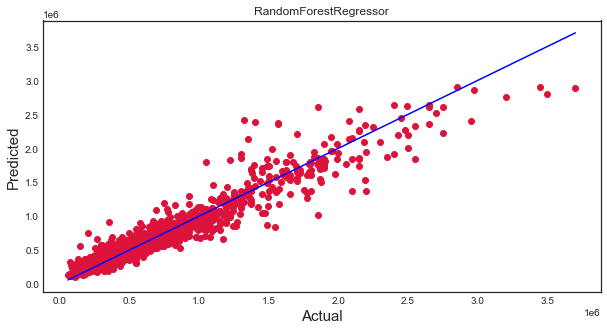

In [104]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestRegressor")
plt.show()

# Thanks For Evaluating